Heart Disease Analysis

Context

Heart disease remains one of the leading causes of mortality worldwide. Exploring the factors associated with heart disease can provide valuable insights into its prevention, diagnosis, and treatment. In this project, we conduct an exploratory data analysis (EDA) on a dataset containing various attributes related to heart health. Our objective is to uncover patterns, relationships, and potential risk factors associated with heart disease.

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Content

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with 
dummy values.


Import The Libraries And Dataset 

In [51]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('heart.csv')

Display Top 5 Rows of The Dataset

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Check The Last 5 Rows of The Dataset

In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Find Shape of Our Datase

In [7]:
data.shape

(1025, 14)

In [8]:
print("Rows: ", data.shape[0])
print("Columns: ", data.shape[1])

Rows:  1025
Columns:  14


Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Check Null Values In The Dataset

In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Check For Duplicate Data and Drop Them

In [12]:
dataDupli = data.duplicated().any()
print(dataDupli)

True


In [13]:
data = data.drop_duplicates()

In [14]:
data.shape

(302, 14)

Overall Statistics About The Dataset

In [15]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Draw Correlation Matrix

In [16]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

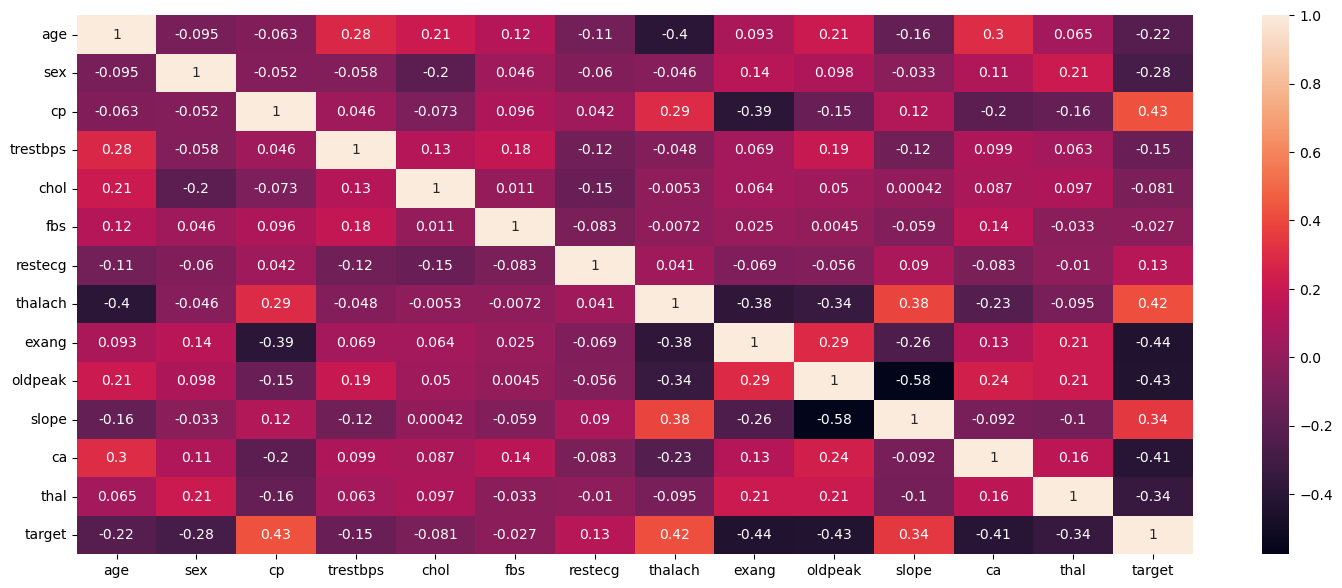

In [17]:
plt.figure(figsize=(18,7))
sns.heatmap(data.corr(),annot=True)

How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [18]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [45]:
# Count the occurrences of each value in the 'target' column
target_counts = data['target'].value_counts()

# Display the count
print("Number of people without heart disease:", target_counts[0])
print("Number of people with heart disease:", target_counts[1])

Number of people without heart disease: 138
Number of people with heart disease: 164


<Axes: xlabel='target', ylabel='count'>

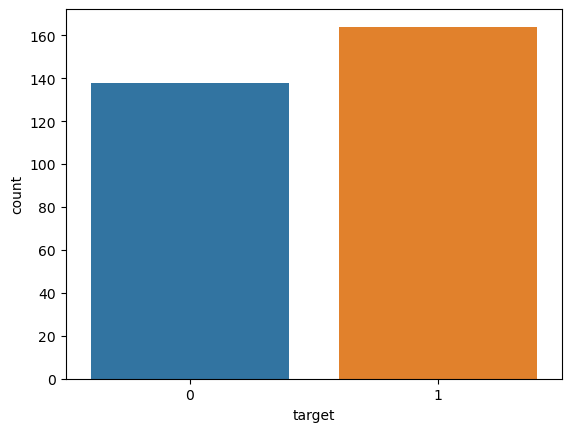

In [61]:
sns.countplot(data=data, x='target')

Find Count of  Male & Female in this Dataset

In [47]:
data['sex'].value_counts()


sex
1    206
0     96
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

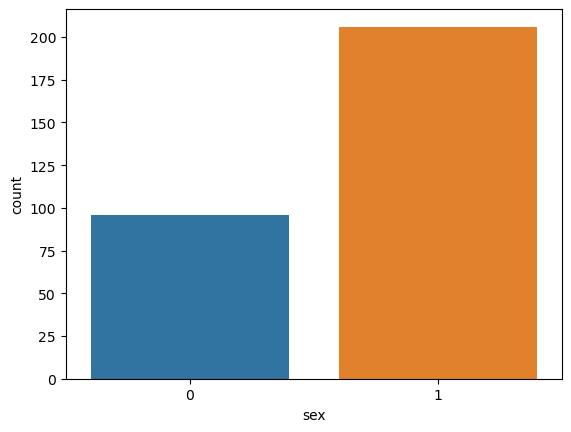

In [62]:
sns.countplot(data=data, x='sex')

Check Age Distribution In The Dataset

<Axes: xlabel='age', ylabel='Count'>

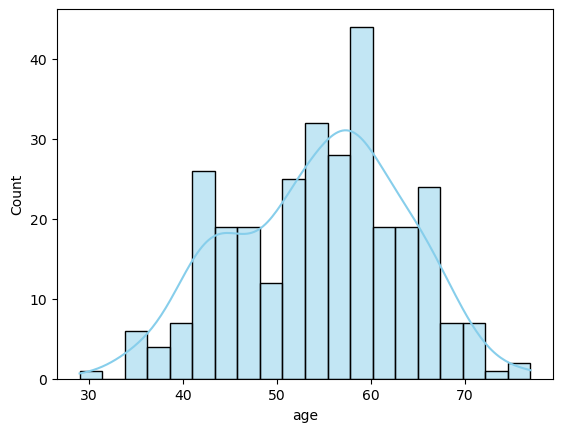

In [52]:
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')

Check Chest Pain Type

<Axes: xlabel='cp', ylabel='count'>

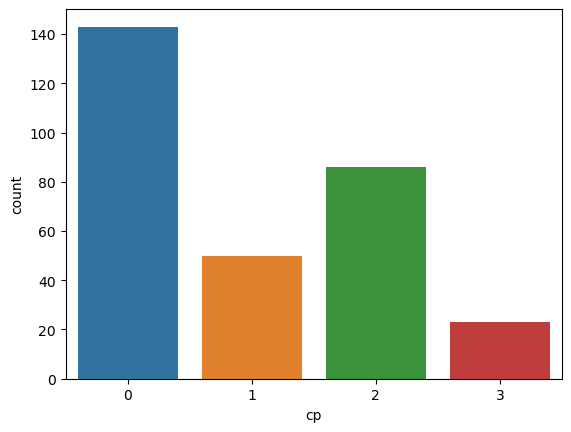

In [60]:
sns.countplot(data=data, x='cp')

The Chest Pain Distribution As Per Target Variable

<Axes: xlabel='cp', ylabel='count'>

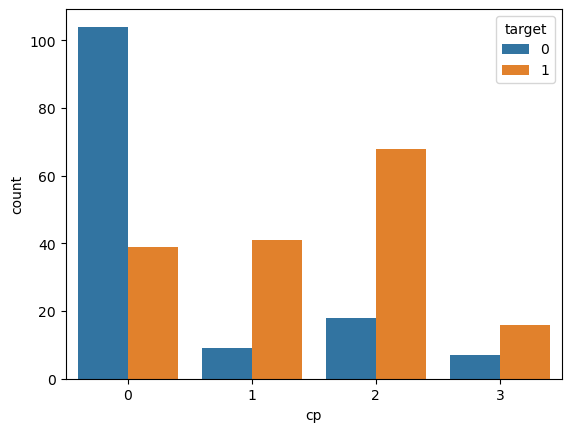

In [59]:
sns.countplot(data=data, x='cp', hue='target')

Fasting Blood Sugar Distribution According To Target Variable

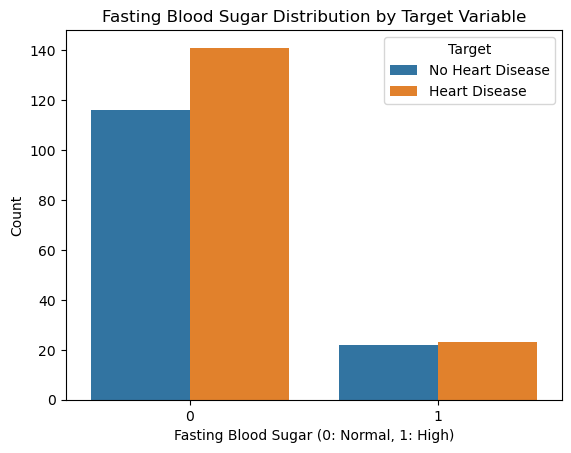

In [63]:
sns.countplot(data=data, x='fbs', hue='target')
plt.title('Fasting Blood Sugar Distribution by Target Variable')
plt.xlabel('Fasting Blood Sugar (0: Normal, 1: High)')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

 Resting Blood Pressure Distribution

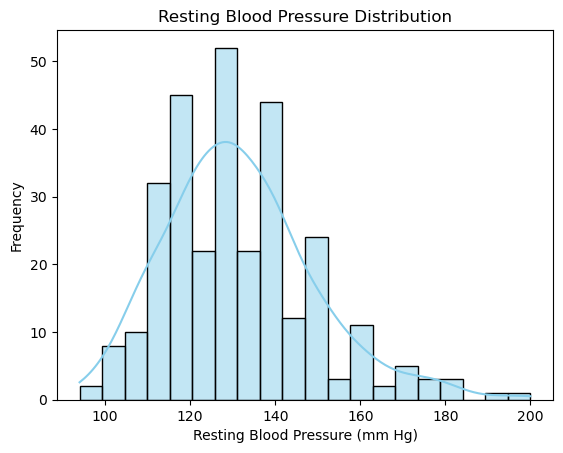

In [64]:
sns.histplot(data['trestbps'], bins=20, kde=True, color='skyblue')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

Compare Resting Blood Pressure As Per Sex Column

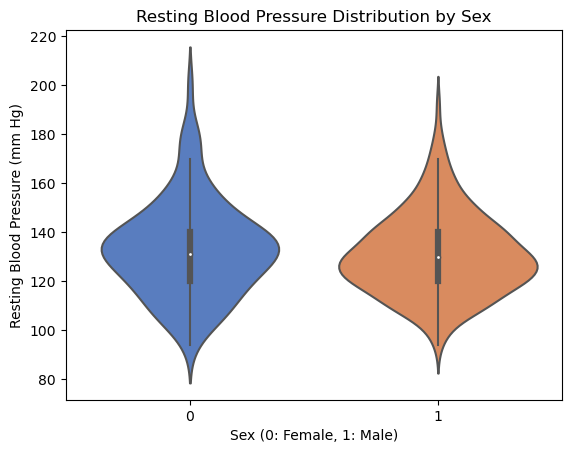

In [67]:
sns.violinplot(data=data, x='sex', y='trestbps', palette='muted')
plt.title('Resting Blood Pressure Distribution by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

Distribution of Serum cholesterol

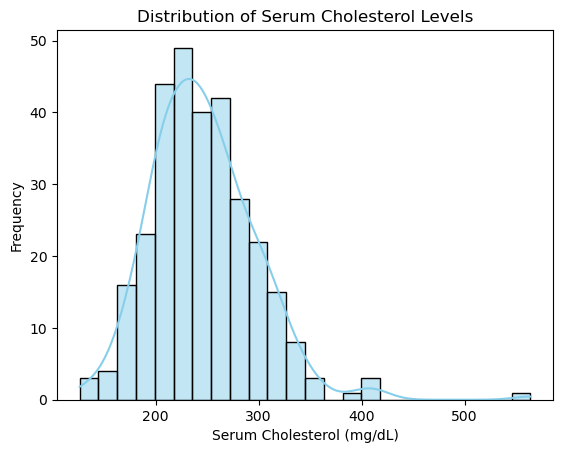

In [68]:
sns.histplot(data['chol'], kde=True, color='skyblue')
plt.title('Distribution of Serum Cholesterol Levels')
plt.xlabel('Serum Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

Plot Continuous Variables

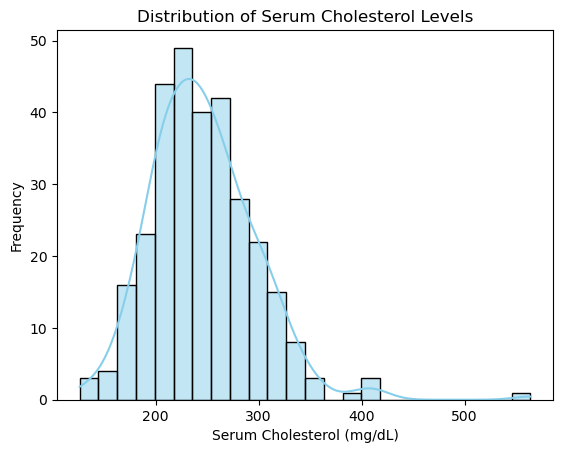

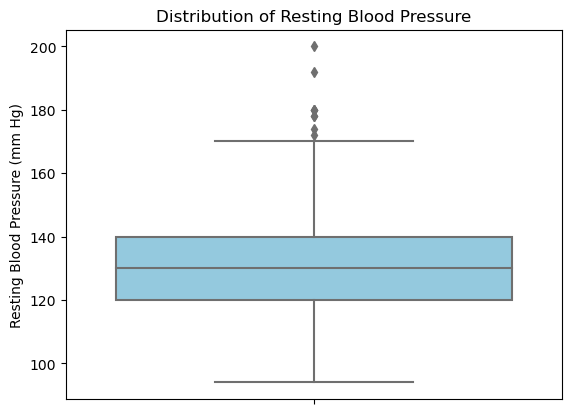

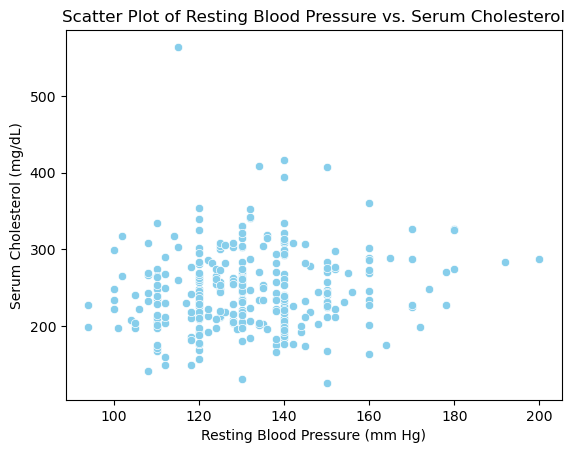

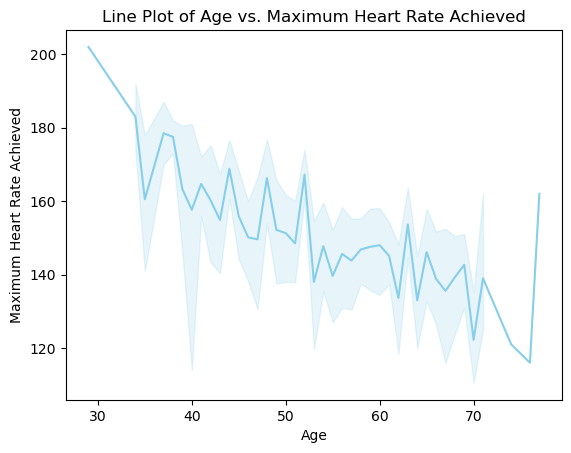

In [69]:
sns.histplot(data['chol'], kde=True, color='skyblue')
plt.title('Distribution of Serum Cholesterol Levels')
plt.xlabel('Serum Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data=data, y='trestbps', color='skyblue')
plt.title('Distribution of Resting Blood Pressure')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

sns.scatterplot(data=data, x='trestbps', y='chol', color='skyblue')
plt.title('Scatter Plot of Resting Blood Pressure vs. Serum Cholesterol')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Serum Cholesterol (mg/dL)')
plt.show()

sns.lineplot(data=data, x='age', y='thalach', color='skyblue')
plt.title('Line Plot of Age vs. Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()